In [1]:
from windwhisper import windturbines

In [1]:
from windwhisper import windturbines
wind_turbines = [
    {"name": "Turbine 1", "power": 2.5e3, "diameter": 100, "hub height": 80, "position": (47.346060, 8.508267)},
    {"name": "Turbine 2", "power": 3.0e3, "diameter": 105, "hub height": 85, "position": (47.3869, 8.5517)},
    #{"name": "Turbine 3", "power": 3.5e3, "diameter": 110, "hub height": 90, "position": (47.3969, 8.5617)},
    #{"name": "Turbine 4", "power": 4.0e3, "diameter": 115, "hub height": 95, "position": (47.3869, 8.5317)},
    #{"name": "Turbine 5", "power": 4.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)},
]

listening_points = [
    {"name": "Listener 1", "position": (47.3769, 8.5517)},
    {"name": "Listener 2", "position": (47.3869, 8.5617)},
    {"name": "Listener 3", "position": (47.3461, 8.5175)},
    {"name": "Listener 4", "position": (47.3061, 8.4075)},
]


wt = windturbines.WindTurbines(wind_turbines=wind_turbines, listeners=listening_points,)

wt.fetch_wind_speeds(debug=False)




Starting concurrent data download for all turbines...
Done.


/Users/maximebalandret/opt/anaconda3/envs/noise/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [2]:
wt.fetch_noise_map()
#wt.noise_map.Z
wt.analyze_noise()

In [3]:
wt.noise_map.plot_relief_between_points('Turbine 1','Listener 1')

In [4]:
wt.na.analyze_and_calculate_lden()

interpolate noise for every wind speeds at wind turbine!
step 2/5 done!
noise emissions separated as day/evening/night emissions
Lden calculated!
wt.listeners updated with Lden!


({'Listener 1': 29.7,
  'Listener 2': 33.8,
  'Listener 3': 35.5,
  'Listener 4': 7.4},
 [{'name': 'Listener 1', 'position': (47.3769, 8.5517), 'L_den': 29.7},
  {'name': 'Listener 2', 'position': (47.3869, 8.5617), 'L_den': 33.8},
  {'name': 'Listener 3', 'position': (47.3461, 8.5175), 'L_den': 35.5},
  {'name': 'Listener 4', 'position': (47.3061, 8.4075), 'L_den': 7.4}],
 {'Listener 1': {'day': <xarray.DataArray (time: 17544)>
   array([3.01029996, 3.01029996, 3.01029996, ..., 3.01029996, 3.01029996,
          3.01029996])
   Coordinates:
     * time     (time) datetime64[ns] 2016-01-01T07:00:00 ... 2017-12-31T18:30:00,
   'evening': <xarray.DataArray (time: 5848)>
   array([17.80892248, 18.57122957, 19.0511402 , ..., 11.43637246,
          11.51817652, 11.61861169])
   Coordinates:
     * time     (time) datetime64[ns] 2016-01-01T19:00:00 ... 2017-12-31T22:30:00,
   'night': <xarray.DataArray (time: 11696)>
   array([ 3.01029996,  3.01029996,  3.01029996, ..., 28.15120161,
         


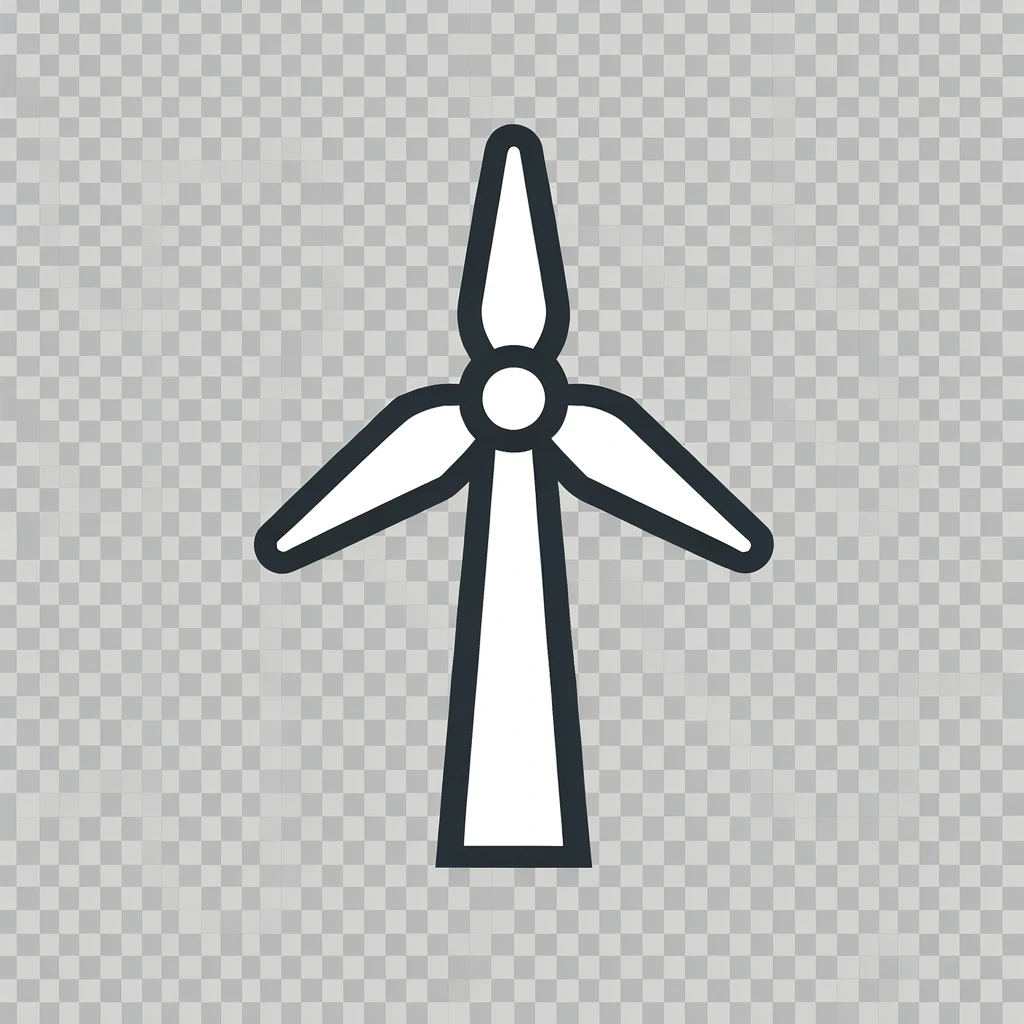

In [5]:
wt.na.display_listeners_on_map_with_Lden()

In [ ]:
wt.noise_map.generate_noise_map

In [8]:
wt.listeners

[{'name': 'Listener 1',
  'position': (47.3769, 8.5517),
  'L_den': 31.25877206162024},
 {'name': 'Listener 2',
  'position': (47.3869, 8.5617),
  'L_den': 35.705151414308396},
 {'name': 'Listener 3',
  'position': (47.3461, 8.5175),
  'L_den': 35.84708092429531},
 {'name': 'Listener 4',
  'position': (47.3061, 8.4075),
  'L_den': 11.358195468243135}]

In [8]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)},
 {'name': 'Turbine 3',
  'power': 3500.0,
  'diameter': 110.0,
  'hub height': 90.0,
  'position': (47.3969, 8.5617)},
 {'name': 'Turbine 4',
  'power': 4000.0,
  'diameter': 115.0,
  'hub height': 95.0,
  'position': (47.3869, 8.5317)},
 {'name': 'Turbine 5',
  'power': 4000.0,
  'diameter': 120.0,
  'hub height': 95.0,
  'position': (47.34955801547433, 8.491580864126439)}]

In [6]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [9]:
interpolated_noise = wt.na.interpolate_noise3(wt.ws.wind_speed, wt.noise_map.individual_noise)

In [17]:
import numpy as np
all_listeners_time_series = {}

# Loop over each listener in the class's listeners list.
for listener in wt.listeners:
    listener_name = listener['name']  # Extract the name of the current listener.

    # Filter the interpolated noise data to get data relevant to the current listener.
    # This creates a dictionary of turbine data (interpolated intensity) for this specific listener.
    listener_data = {turbine: data for (lstnr, turbine), data in interpolated_noise.items() if lstnr == listener_name}
    print("listener data:", listener_data)
    # Convert dB to power for each turbine's data at each time point and sum them.
    # dB values are converted to power using the formula: power = 10^(dB/10).
    # The sum is computed using a list comprehension that iterates over each turbine's data.
    power_sums = sum([10 ** (turbine_data['interpolated_intensity'] / 10) for turbine_data in listener_data.values()])
    print(f'power_sums:', power_sums)
    # Convert the total power sum back to dB for each time point.
    # The dB value is calculated using the formula: dB = 10 * log10(power).
    total_dB_time_series = 10 * np.log10(power_sums)
    print(f'total_dB_time_series:', total_dB_time_series)
    # Store the resulting time series of cumulative dB values for the listener.
    # The key is the listener's name, and the value is the cumulative dB time series.
    all_listeners_time_series[listener_name] = total_dB_time_series
    print(f'all_listeners_time_series:', all_listeners_time_series)
# Return the dictionary containing cumulative dB time series for each listener.
return all_listeners_time_series

listener data: {'Turbine 1': {'interpolated_intensity': <xarray.DataArray (time: 35088)>
array([ 0.        ,  0.        ,  0.        , ..., 11.30716124,
       11.37816071, 11.59973508])
Coordinates:
    turbine     <U9 'Turbine 1'
    wind_speed  (time) float32 0.8705 1.437 1.716 1.728 ... 8.612 9.008 10.13
  * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00, 'distance': 4739.384368091734}, 'Turbine 2': {'interpolated_intensity': <xarray.DataArray (time: 35088)>
array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , 17.40756771])
Coordinates:
    turbine     <U9 'Turbine 2'
    wind_speed  (time) float32 2.057 2.132 2.035 1.824 ... 2.413 2.442 3.27
  * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00, 'distance': 1111.9508023352598}, 'Turbine 3': {'interpolated_intensity': <xarray.DataArray (time: 35088)>
array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       9.67216746])
Coordinates:
    tur

SyntaxError: 'return' outside function (943884710.py, line 26)

In [4]:
interpolation=wt.na.interpolate_noise3(wt.ws.wind_speed,wt.noise_map.individual_noise)

In [5]:
cumulative_dB=wt.na.calculate_cumulative_dB(interpolation)

In [6]:
noise_separated=wt.na.separate_noise_emissions(cumulative_dB)

In [7]:
Lden=wt.na.compute_lden(noise_separated)

In [8]:
wt.na.update_listeners_with_lden(Lden)

[{'name': 'Listener 1',
  'position': (47.3769, 8.5517),
  'L_den': 21.96446210606624},
 {'name': 'Listener 2',
  'position': (47.3869, 8.5617),
  'L_den': 23.70994975710586},
 {'name': 'Listener 3',
  'position': (47.3461, 8.5175),
  'L_den': 25.490979915721915},
 {'name': 'Listener 4',
  'position': (47.3061, 8.4075),
  'L_den': 9.918450414395107}]

In [9]:
wt.na.update_listeners_with_lden(Lden)

[{'name': 'Listener 1',
  'position': (47.3769, 8.5517),
  'L_den': 21.96446210606624},
 {'name': 'Listener 2',
  'position': (47.3869, 8.5617),
  'L_den': 23.70994975710586},
 {'name': 'Listener 3',
  'position': (47.3461, 8.5175),
  'L_den': 25.490979915721915},
 {'name': 'Listener 4',
  'position': (47.3061, 8.4075),
  'L_den': 9.918450414395107}]

In [7]:
wt.listeners

[{'name': 'Listener 1',
  'position': (47.3769, 8.5517),
  'L_den': 31.25877206162024},
 {'name': 'Listener 2',
  'position': (47.3869, 8.5617),
  'L_den': 35.705151414308396},
 {'name': 'Listener 3',
  'position': (47.3461, 8.5175),
  'L_den': 35.84708092429531},
 {'name': 'Listener 4',
  'position': (47.3061, 8.4075),
  'L_den': 11.358195468243135}]

In [14]:
# Update wt.listeners with L_den values
for listener in wt.listeners:
    listener_name = listener['name']
    if listener_name in Lden:
        # Extract the numerical value from the xarray DataArray
        lden_value = Lden[listener_name].values.item()
        listener['L_den'] = lden_value

# wt.listeners is now updated with L_den values
print(wt.listeners)

[{'name': 'Listener 1', 'position': (47.3769, 8.5517), 'L_den': 21.96446210606624}, {'name': 'Listener 2', 'position': (47.3869, 8.5617), 'L_den': 23.70994975710586}, {'name': 'Listener 3', 'position': (47.3461, 8.5175), 'L_den': 25.490979915721915}, {'name': 'Listener 4', 'position': (47.3061, 8.4075), 'L_den': 9.918450414395107}]


In [11]:
import numpy as np

def compute_lden(separated_data):
    lden_values = {}

    for listener, periods in separated_data.items():
        # Calculate average noise levels for day, evening, and night
        L_day_avg = periods['day'].mean()
        L_evening_avg = periods['evening'].mean()
        L_night_avg = periods['night'].mean()

        # Convert dB to power, apply weightings, and sum
        L_den_power = (12 * 10 ** (L_day_avg / 10)) + \
                      (4 * 10 ** ((L_evening_avg + 5) / 10)) + \
                      (8 * 10 ** ((L_night_avg + 10) / 10))

        # Convert back to dB to get L_den
        L_den = 10 * np.log10(L_den_power / 24)

        # Store L_den value for this listener
        lden_values[listener] = L_den

    return lden_values

# Example usage
lden_values = compute_lden(noise_separated)


In [8]:
d={(p["turbine_name"], p["listener_name"]): p for p in wt.noise_map.individual_noise}

In [33]:
# Initialize a dictionary to store the results
turbine_names = []
for turbine in wt.wind_turbines:
    turbine_names.append(turbine['name'])

closest_turbine_distance = {}

# Loop over each listener
for listener in wt.listeners:
    listener_name = listener['name']  # Extract the name of the current listener.
    # Find the distance to each turbine and get the minimum
    min_distance = min(d[(turbine['name'], listener_name)]['distance'] for turbine in wt.wind_turbines)
    closest_turbine_distance[listener_name] = min_distance

# Now, closest_turbine_distance contains the minimum distance to a turbine for each listener



In [30]:
turbine_names

['Turbine 1', 'Turbine 2', 'Turbine 3', 'Turbine 4', 'Turbine 5']

In [35]:
closest_turbine_distance

{'Listener 1': 1111.9508023352598,
 'Listener 2': 752.8398985459942,
 'Listener 3': 695.6494188726895,
 'Listener 4': 7969.270457422533}

In [13]:
lden_values

{'Listener 1': <xarray.DataArray ()>
 array(21.96446211)
 Coordinates:
     turbine  <U9 'Turbine 5',
 'Listener 2': <xarray.DataArray ()>
 array(23.70994976)
 Coordinates:
     turbine  <U9 'Turbine 5',
 'Listener 3': <xarray.DataArray ()>
 array(25.49097992)
 Coordinates:
     turbine  <U9 'Turbine 5',
 'Listener 4': <xarray.DataArray ()>
 array(9.91845041)
 Coordinates:
     turbine  <U9 'Turbine 5'}

In [7]:
noise_separated

{'Listener 1': {'day': <xarray.DataArray (time: 17544)>
  array([ 6.98970004,  6.98970004,  6.98970004, ...,  9.79831268,
         10.83839338, 10.9503062 ])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01T07:00:00 ... 2017-12-31T18:3...
      turbine     <U9 'Turbine 5'
      wind_speed  (time) float32 1.82 1.132 1.379 1.973 ... 5.641 6.514 6.612,
  'evening': <xarray.DataArray (time: 5848)>
  array([20.71928917, 21.46188882, 21.51908528, ..., 21.21382862,
         24.78160326, 25.03779045])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01T19:00:00 ... 2017-12-31T22:3...
      turbine     <U9 'Turbine 5'
      wind_speed  (time) float32 3.207 3.467 3.272 3.037 ... 4.996 5.894 7.073,
  'night': <xarray.DataArray (time: 11696)>
  array([ 6.65262848,  6.73213693,  6.77142592, ..., 29.55417572,
         25.07710115, 25.87905657])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
      turbine     <U9 'Turbine 5'
  

In [7]:
cumulative_dB

{'Listener 1': <xarray.DataArray (time: 35088)>
 array([ 6.65262848,  6.73213693,  6.77142592, ..., 25.03779045,
        25.07710115, 25.87905657])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462 3.576 3.629 3.756 ... 7.073 7.99 9.228,
 'Listener 2': <xarray.DataArray (time: 35088)>
 array([ 6.26424319,  6.29644605,  6.31248869, ..., 22.52583419,
        22.55816194, 25.96047389])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462 3.576 3.629 3.756 ... 7.073 7.99 9.228,
 'Listener 3': <xarray.DataArray (time: 35088)>
 array([14.34479133, 14.82280921, 15.04384207, ..., 36.45407354,
        36.56675426, 36.76412056])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462

In [14]:
import pandas as pd
import xarray as xr

# Define the time ranges
day_start, day_end = '07:00', '19:00'
evening_start, evening_end = '19:00', '23:00'
night_end = '07:00'  # Night starts from evening_end to day_start

# Initialize a dictionary to store separated data
separated_data = {}

for listener, data in cumulative_dB.items():
    # Convert time to a pandas datetime index for easy time-based filtering
    time_index = pd.to_datetime(data['time'].values)

    # Create boolean masks for day, evening, and night
    day_mask = xr.DataArray((time_index.time >= pd.to_datetime(day_start).time()) & (time_index.time < pd.to_datetime(day_end).time()), coords={'time': data['time']}, dims=['time'])
    evening_mask = xr.DataArray((time_index.time >= pd.to_datetime(evening_start).time()) & (time_index.time < pd.to_datetime(evening_end).time()), coords={'time': data['time']}, dims=['time'])
    night_mask = xr.DataArray((time_index.time >= pd.to_datetime(evening_end).time()) | (time_index.time < pd.to_datetime(night_end).time()), coords={'time': data['time']}, dims=['time'])

    # Separate the data into day, evening, and night
    day_data = data.where(day_mask, drop=True)
    evening_data = data.where(evening_mask, drop=True)
    night_data = data.where(night_mask, drop=True)

    # Store the separated data
    separated_data[listener] = {'day': day_data, 'evening': evening_data, 'night': night_data}

# separated_data now contains the noise data separated into day, evening, and night for each listener


In [15]:
separated_data

{'Listener 1': {'day': <xarray.DataArray (time: 17544)>
  array([ 6.98970004,  6.98970004,  6.98970004, ...,  9.79831268,
         10.83839338, 10.9503062 ])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01T07:00:00 ... 2017-12-31T18:3...
      turbine     <U9 'Turbine 5'
      wind_speed  (time) float32 1.82 1.132 1.379 1.973 ... 5.641 6.514 6.612,
  'evening': <xarray.DataArray (time: 5848)>
  array([20.71928917, 21.46188882, 21.51908528, ..., 21.21382862,
         24.78160326, 25.03779045])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01T19:00:00 ... 2017-12-31T22:3...
      turbine     <U9 'Turbine 5'
      wind_speed  (time) float32 3.207 3.467 3.272 3.037 ... 4.996 5.894 7.073,
  'night': <xarray.DataArray (time: 11696)>
  array([ 6.65262848,  6.73213693,  6.77142592, ..., 29.55417572,
         25.07710115, 25.87905657])
  Coordinates:
    * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
      turbine     <U9 'Turbine 5'
  

In [20]:
import numpy as np

all_listeners_time_series = {}

# Loop over each listener
for listener in wt.listeners:
    listener_name = listener['name']
    # Filter the data for the current listener
    listener_data = {turbine: data for (lstnr, turbine), data in interpolation.items() if lstnr == listener_name}

    # Convert dB to power and sum across turbines for each time point
    # Using a list comprehension to accumulate power values from each turbine
    power_sums = sum([10 ** (turbine_data['interpolated_intensity'] / 10) for turbine_data in listener_data.values()])

    # Convert the total power back to dB for each time point
    total_dB_time_series = 10 * np.log10(power_sums)

    # Store the time series dB data for this listener
    all_listeners_time_series[listener_name] = total_dB_time_series

# all_listeners_time_series now contains the summed dB values at each time point for each listener


In [21]:
all_listeners_time_series

{'Listener 1': <xarray.DataArray (time: 35088)>
 array([ 6.65262848,  6.73213693,  6.77142592, ..., 25.03779045,
        25.07710115, 25.87905657])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462 3.576 3.629 3.756 ... 7.073 7.99 9.228,
 'Listener 2': <xarray.DataArray (time: 35088)>
 array([ 6.26424319,  6.29644605,  6.31248869, ..., 22.52583419,
        22.55816194, 25.96047389])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462 3.576 3.629 3.756 ... 7.073 7.99 9.228,
 'Listener 3': <xarray.DataArray (time: 35088)>
 array([14.34479133, 14.82280921, 15.04384207, ..., 36.45407354,
        36.56675426, 36.76412056])
 Coordinates:
   * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
     turbine     <U9 'Turbine 5'
     wind_speed  (time) float32 3.462

In [37]:
interpolated_noise = d[('Turbine 1', 'Listener 1')]['intensity_level_dB'].interp(wind_speed=wt.ws.wind_speed["WS10"].sel(turbine='Turbine 1'))
interpolated_noise

<xarray.DataArray (time: 35088)>
array([        nan,         nan,         nan, ..., 11.30716124,
       11.37816071, 11.59973508])
Coordinates:
    turbine     <U9 'Turbine 1'
    wind_speed  (time) float32 0.8705 1.437 1.716 1.728 ... 8.612 9.008 10.13
  * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00

In [56]:
turbine=wt.wind_turbines[0]
turbine['name']

'Turbine 1'

In [57]:
listener=wt.listeners[0]
listener['name']

'Listener 1'

In [60]:
d[(turbine['name'], listener['name'])]['intensity_level_dB'].interp(wind_speed=wt.ws.wind_speed["WS10"])

ValueError: dimension 'turbine' already exists as a scalar variable

In [63]:
interp(wind_speed=wt.ws.wind_speed["WS10"].sel(turbine=[turbine['name']]))

NameError: name 'interp' is not defined

In [65]:
for turbine in wt.wind_turbines:
    for listener in wt.listeners:
        d[(turbine['name'], listener['name'])]['intensity_level_dB'].interp(wind_speed=wt.ws.wind_speed["WS10"].sel(turbine=turbine['name']))

In [89]:
import numpy as np
import xarray as xr

# Initialize a dictionary to store the results of the interpolation and the distances for each listener-turbine pair.
interpolated_results = {}

# Loop over each listener in the list of listeners.
for listener in wt.listeners:
    listener_name = listener['name']  # Extract the name of the current listener.

    # Loop over each turbine in the list of wind turbines.
    for turbine in wt.wind_turbines:
        turbine_name = turbine['name']  # Extract the name of the current turbine.

        # Retrieve the distance data for the current listener-turbine pair.
        distance = d[(turbine_name, listener_name)]['distance']

        # Select the wind speed data for the current turbine.
        wind_speed_data = wt.ws.wind_speed["WS10"].sel(turbine=turbine_name)

        # Retrieve the intensity level data for the current listener-turbine pair.
        intensity_data = d[(turbine_name, listener_name)]['intensity_level_dB']

        # Interpolate the intensity data at the wind speeds of the current turbine.
        interpolated_value = intensity_data.interp(wind_speed=wind_speed_data)

        # Replace NaN values in the interpolated data with 0.
        interpolated_value = xr.where(np.isnan(interpolated_value), 0, interpolated_value)

        # Store the interpolated values and the distance in the dictionary.
        # Each key (listener and turbine names) maps to a dictionary with both the interpolated values and the distance.
        interpolated_results[(listener_name, turbine_name)] = {
            'interpolated_intensity': interpolated_value,
            'distance': distance
        }

# At this point, 'interpolated_results' contains the interpolated data and distances for each listener-turbine pair.


In [90]:
interpolated_results

{('Listener 1',
  'Turbine 1'): {'interpolated_intensity': <xarray.DataArray (time: 35088)>
  array([ 0.        ,  0.        ,  0.        , ..., 11.30716124,
         11.37816071, 11.59973508])
  Coordinates:
      turbine     <U9 'Turbine 1'
      wind_speed  (time) float32 0.8705 1.437 1.716 1.728 ... 8.612 9.008 10.13
    * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00, 'distance': 4739.384368091734},
 ('Listener 1',
  'Turbine 2'): {'interpolated_intensity': <xarray.DataArray (time: 35088)>
  array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , 17.40756771])
  Coordinates:
      turbine     <U9 'Turbine 2'
      wind_speed  (time) float32 2.057 2.132 2.035 1.824 ... 2.413 2.442 3.27
    * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00, 'distance': 1111.9508023352598},
 ('Listener 1',
  'Turbine 3'): {'interpolated_intensity': <xarray.DataArray (time: 35088)>
  array([0.        , 0.        , 0.        , ..

In [76]:
wt.ws.wind_speed

<xarray.Dataset>
Dimensions:  (turbine: 5, time: 35088)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
  * turbine  (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 4' 'Turbine 5'
Data variables:
    WD10     (turbine, time) float32 231.0 217.0 218.7 ... 244.4 250.3 249.1
    WS10     (turbine, time) float32 0.8705 1.437 1.716 ... 7.073 7.99 9.228

In [75]:
interpolated_results

{('Listener 1',
  'Turbine 1'): array([ 0.        ,  0.        ,  0.        , ..., 11.30716124,
        11.37816071, 11.59973508]),
 ('Listener 1',
  'Turbine 2'): array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 17.40756771]),
 ('Listener 1',
  'Turbine 3'): array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        9.67216746]),
 ('Listener 1',
  'Turbine 4'): array([ 0.        ,  0.        ,  0.        , ..., 24.67699369,
        24.69675372, 24.73063352]),
 ('Listener 1',
  'Turbine 5'): array([-2.03003008, -1.47464345, -1.22102987, ...,  9.9641875 ,
        10.51420387, 10.48721531]),
 ('Listener 2',
  'Turbine 1'): array([0.        , 0.        , 0.        , ..., 6.5045372 , 6.57553666,
        6.79711103]),
 ('Listener 2',
  'Turbine 2'): array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 21.51344841]),
 ('Listener 2',
  'Turbine 3'): array([ 0.        ,  0.        ,  0.        , ...,  0.  

In [52]:
for turbine in wt.wind_turbines:
    for listener in wt.listeners:
        print(turbine['name'])
        print(listener['name'])

Turbine 1
Listener 1
Turbine 1
Listener 2
Turbine 1
Listener 3
Turbine 1
Listener 4
Turbine 2
Listener 1
Turbine 2
Listener 2
Turbine 2
Listener 3
Turbine 2
Listener 4
Turbine 3
Listener 1
Turbine 3
Listener 2
Turbine 3
Listener 3
Turbine 3
Listener 4
Turbine 4
Listener 1
Turbine 4
Listener 2
Turbine 4
Listener 3
Turbine 4
Listener 4
Turbine 5
Listener 1
Turbine 5
Listener 2
Turbine 5
Listener 3
Turbine 5
Listener 4


In [44]:
turbine_names = [turbine['name'] for turbine in wt.wind_turbines]
turbine_names

['Turbine 1', 'Turbine 2', 'Turbine 3', 'Turbine 4', 'Turbine 5']

In [42]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)},
 {'name': 'Turbine 3',
  'power': 3500.0,
  'diameter': 110.0,
  'hub height': 90.0,
  'position': (47.3969, 8.5617)},
 {'name': 'Turbine 4',
  'power': 4000.0,
  'diameter': 115.0,
  'hub height': 95.0,
  'position': (47.3869, 8.5317)},
 {'name': 'Turbine 5',
  'power': 4000.0,
  'diameter': 120.0,
  'hub height': 95.0,
  'position': (47.34955801547433, 8.491580864126439)}]

In [23]:
wt.listeners

[{'name': 'Listener 1', 'position': (47.3769, 8.5517)},
 {'name': 'Listener 2', 'position': (47.3869, 8.5617)},
 {'name': 'Listener 3', 'position': (47.3461, 8.5175)},
 {'name': 'Listener 4', 'position': (47.3061, 8.4075)}]

In [32]:
wt.ws.wind_speed

<xarray.Dataset>
Dimensions:  (turbine: 5, time: 35088)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
  * turbine  (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 4' 'Turbine 5'
Data variables:
    WD10     (turbine, time) float32 231.0 217.0 218.7 ... 244.4 250.3 249.1
    WS10     (turbine, time) float32 0.8705 1.437 1.716 ... 7.073 7.99 9.228

In [34]:
wt.ws.wind_speed["WS10"].sel(turbine='Turbine 2')

<xarray.DataArray 'WS10' (time: 35088)>
array([2.0572448, 2.1318624, 2.0345478, ..., 2.4132586, 2.4423623,
       3.2700257], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
    turbine  <U9 'Turbine 2'
Attributes:
    grid_mapping:   crs
    long_name:      Wind Speed at 10m
    standard_name:  wind_speed
    units:          m s-1

In [6]:
wt.noise_map.individual_noise

[{'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 1',
  'listener_position': (47.3769, 8.5517),
  'distance': 4739.384368091734,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-0.86271186,  1.64914879,  6.80501367, 10.2505644 , 11.31025255,
         11.19846906, 11.37621179, 11.61089155, 11.52614748, 11.4738891 ])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0},
 {'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 2',
  'listener_position': (47.3869, 8.5617),
  'distance': 6067.685257970055,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-5.66533591, -3.15347526,  2.00238962,  5.44794036,  6.50762851,
          6.39584501,  6.57358774,  6.80826751,  6.72352344,  6.67126505])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) flo

In [ ]:
Lden, Lden_list, cat_data = wt.na.analyze_and_calculate_lden()

Taks 1/4 : Interpolating noise:   0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
wt.ws.wind_speed.sel(turbine="Turbine 1")["WS10"]

<xarray.DataArray 'WS10' (time: 35088)>
array([ 0.8704885,  1.4370455,  1.7163366, ...,  8.611514 ,  9.008305 ,
       10.131649 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
    turbine  <U9 'Turbine 1'
Attributes:
    grid_mapping:   crs
    long_name:      Wind Speed at 10m
    standard_name:  wind_speed
    units:          m s-1

In [23]:
d[("Turbine 1", "Listener 2")]["intensity_level_dB"]

<xarray.DataArray (wind_speed: 10)>
array([-5.66533591, -3.15347526,  2.00238962,  5.44794036,  6.50762851,
        6.39584501,  6.57358774,  6.80826751,  6.72352344,  6.67126505])
Coordinates:
    turbine     <U9 'Turbine 1'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [64]:
d[(turbine['name'], listener['name'])]['intensity_level_dB'].interp(wind_speed=wt.ws.wind_speed["WS10"].sel(turbine=turbine['name']))

<xarray.DataArray (time: 35088)>
array([        nan,         nan,         nan, ..., 11.30716124,
       11.37816071, 11.59973508])
Coordinates:
    turbine     <U9 'Turbine 1'
    wind_speed  (time) float32 0.8705 1.437 1.716 1.728 ... 8.612 9.008 10.13
  * time        (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00

In [57]:
[p for p in wt.noise_map.individual_noise if p["turbine_name"]=="Turbine 1" and p["listener_name"]=="Listener 1"][0]["intensity_level_dB"]

<xarray.DataArray (wind_speed: 10)>
array([-0.86271186,  1.64914879,  6.80501367, 10.2505644 , 11.31025255,
       11.19846906, 11.37621179, 11.61089155, 11.52614748, 11.4738891 ])
Coordinates:
    turbine     <U9 'Turbine 1'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [51]:
wt.wind_turbines['name'].values

TypeError: list indices must be integers or slices, not str

In [ ]:
wt.ws.listening

In [42]:
wt.noise_map.individual_noise

[{'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 1',
  'listener_position': (47.3769, 8.5517),
  'distance': 4739.384368091734,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-0.86271186,  1.64914879,  6.80501367, 10.2505644 , 11.31025255,
         11.19846906, 11.37621179, 11.61089155, 11.52614748, 11.4738891 ])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0},
 {'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 2',
  'listener_position': (47.3869, 8.5617),
  'distance': 6067.685257970055,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-5.66533591, -3.15347526,  2.00238962,  5.44794036,  6.50762851,
          6.39584501,  6.57358774,  6.80826751,  6.72352344,  6.67126505])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) flo

In [53]:
wt.ws.wind_speed

<xarray.Dataset>
Dimensions:  (turbine: 5, time: 35088)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2017-12-31T23:30:00
  * turbine  (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 4' 'Turbine 5'
Data variables:
    WD10     (turbine, time) float32 231.0 217.0 218.7 ... 244.4 250.3 249.1
    WS10     (turbine, time) float32 0.8705 1.437 1.716 ... 7.073 7.99 9.228

In [4]:
wt.noise_map.individual_noise[0]["intensity_level_dB"]

<xarray.DataArray (wind_speed: 10)>
array([-0.86271186,  1.64914879,  6.80501367, 10.2505644 , 11.31025255,
       11.19846906, 11.37621179, 11.61089155, 11.52614748, 11.4738891 ])
Coordinates:
    turbine     <U9 'Turbine 1'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [5]:
cat_data["day"]

[{'time': numpy.datetime64('2016-01-01T06:00:00.000000000'),
  'listener_name': 'Listener 1',
  'dB_level': -67.7268687978806},
 {'time': numpy.datetime64('2016-01-01T06:00:00.000000000'),
  'listener_name': 'Listener 2',
  'dB_level': -67.7268687978806},
 {'time': numpy.datetime64('2016-01-01T06:00:00.000000000'),
  'listener_name': 'Listener 3',
  'dB_level': -68.47828902264833},
 {'time': numpy.datetime64('2016-01-01T06:00:00.000000000'),
  'listener_name': 'Listener 4',
  'dB_level': 0},
 {'time': numpy.datetime64('2016-01-01T06:30:00.000000000'),
  'listener_name': 'Listener 1',
  'dB_level': -67.7268687978806},
 {'time': numpy.datetime64('2016-01-01T06:30:00.000000000'),
  'listener_name': 'Listener 2',
  'dB_level': -67.7268687978806},
 {'time': numpy.datetime64('2016-01-01T06:30:00.000000000'),
  'listener_name': 'Listener 3',
  'dB_level': -68.47828902264833},
 {'time': numpy.datetime64('2016-01-01T06:30:00.000000000'),
  'listener_name': 'Listener 4',
  'dB_level': 0},
 {'tim

In [2]:
wind_turbines = [
    {"name": "Turbine 1", "power": 2.5e3, "diameter": 100, "hub height": 80, "position": (47.346060, 8.508267)},
    {"name": "Turbine 2", "power": 3.0e3, "diameter": 105, "hub height": 85, "position": (47.3869, 8.5517)},
    #{"name": "Turbine 3", "power": 3.5e3, "diameter": 110, "hub height": 90, "position": (47.3969, 8.5617)},
    #{"name": "Turbine 4", "power": 4.0e3, "diameter": 115, "hub height": 95, "position": (47.3869, 8.5317)},
    #{"name": "Turbine 5", "power": 4.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)},
]

listening_points = [
    {"name": "Listener 1", "position": (47.3769, 8.5517)},
    {"name": "Listener 2", "position": (47.3869, 8.5617)},
    {"name": "Listener 3", "position": (47.3461, 8.5175)},
    {"name": "Listener 4", "position": (47.3061, 8.4075)},
]


wt = windturbines.WindTurbines(wind_turbines=wind_turbines, listeners=listening_points,)


In [3]:
wt.fetch_wind_speeds(debug=False)

Starting concurrent data download for all turbines...
Done.


/Users/maximebalandret/opt/anaconda3/envs/noise/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [105]:
speed=wt.ws.wind_speed["WS10"].values
speed[speed<3]=0
speed

array([[ 0.       ,  0.       ,  0.       , ...,  8.611514 ,  9.008305 ,
        10.131649 ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         3.2700257]], dtype=float32)

In [106]:
speed.shape

(2, 35088)

In [107]:
import numpy as np
interp=np.interp(speed[0],wt.noise['wind_speed'], wt.noise[0])
interp

array([ 93.12259415,  93.12259415,  93.12259415, ..., 105.29246725,
       105.36346672, 105.58504109])

In [108]:
interp.shape

(35088,)

In [109]:
interp2=np.where(speed[0]==0, 0, interp)

In [110]:
interp2.shape

(35088,)

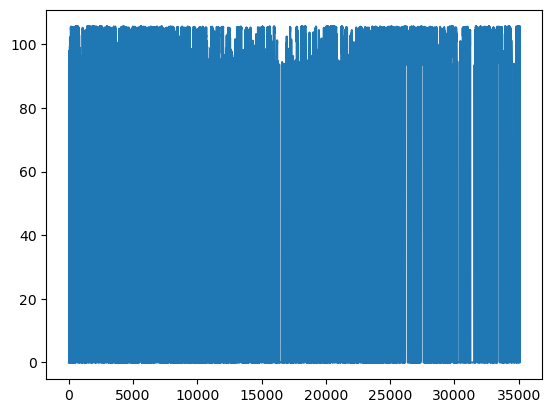

In [111]:
import matplotlib.pyplot as plt
plt.plot(interp2.T)

In [75]:
import scipy as sc

In [ ]:
sc.interpolate.interp2d

In [4]:
import numpy as np

wt.fetch_noise_map()
#wt.noise_map.Z
wt.analyze_noise()

In [6]:
wt.analyze_noise()

In [10]:
wt.noise['wind_speed']

<xarray.DataArray 'wind_speed' (wind_speed: 10)>
array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
Coordinates:
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Attributes:
    units:    m/s

In [19]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [22]:
wt.noise.sel(turbine='Turbine 1')

<xarray.DataArray (wind_speed: 10)>
array([ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
       105.29555857, 105.18377507, 105.3615178 , 105.59619756,
       105.51145349, 105.45919511])
Coordinates:
    turbine     <U9 'Turbine 1'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [46]:
ws_data_array = wt.ws.wind_speed['WS10'] #Array with columns of wind speeds at WT location. wind speeds we want to determine noise from
turbines = ws_data_array.turbine.values #list of turbine names        
wt.noise['wind_speed'] #wind speed corresponding to noise emission in wt.noise
x = wt.noise['wind_speed'] #wind speed corresponding to noise emission in wt.noise
y = wt.noise
result = {}  # Initialize an empty dictionary

for WT in turbines:
    interpolation = np.interp(ws_data_array.sel(turbine=WT), x, y.sel(turbine=WT))
    result[WT] = interpolation

In [52]:
len(result['Turbine 1'])

35088

In [53]:
[1] + [2]

[1, 2]

In [54]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [39]:
ws_data_array.sel(WT='turbine').np_array

KeyError: "'WT' is not a valid dimension or coordinate"

In [32]:
wt.noise_map.display_turbines_on_map()

In [15]:
for turbine in wt.wind_turbines:
    interpolation = np.interp(wt.ws.wind_speed[turbine],x,y)
    results[turbine] = interpolation

ValueError: Dimensions {'name', 'power', 'position', 'diameter', 'hub height'} do not exist. Expected one or more of Frozen({'turbine': 5, 'time': 35088})

In [7]:
Lden, Lden_list, cat_data = wt.na.analyze_and_calculate_lden()

Taks 1/4 : Interpolating noise:   0%|          | 0/2 [00:00<?, ?it/s]

Task3/4 : Categorizing sound emissions:   0%|          | 0/140352 [00:00<?, ?it/s]

Calculating Lden values:   0%|          | 0/4 [00:00<?, ?it/s]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [8]:
wt.na.add_lden_values_to_listeners(Lden)
wt.listeners

[{'name': 'Listener 1',
  'position': (47.3769, 8.5517),
  'Lden_value': 36.80757813136165},
 {'name': 'Listener 2',
  'position': (47.3869, 8.5617),
  'Lden_value': 37.80785681717364},
 {'name': 'Listener 3',
  'position': (47.3461, 8.5175),
  'Lden_value': 36.85555899268276},
 {'name': 'Listener 4',
  'position': (47.3061, 8.4075),
  'Lden_value': 6.39524300131864}]

In [11]:
import folium 
# Get the average latitude and longitude to center the map
avg_lat = sum(listener['position'][0] for listener in wt.listeners) / len(wt.listeners)
avg_lon = sum(listener['position'][1] for listener in wt.listeners) / len(wt.listeners)

# Create a folium map centered at the average latitude and longitude
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=7)

# Add markers for each listener with their respective Lden value
for listener in wt.listeners:
    folium.Marker(
        location=listener['position'],
        tooltip=f"{listener['name']}: Lden {listener['Lden_value']} dB",
        icon=folium.Icon(icon="info-sign", color="green")
    ).add_to(m)

for turbine in wt.wind_turbines:
    folium.Marker(
        location=turbine['position'],
        tooltip=f"{turbine['name']}",
        icon=folium.Icon(icon="info-sign", color="red")).add_to(m)
    
# Display the map
display(m)

In [18]:
wt.ws.download_weibull_coefficients()

{'Turbine 1': {'A': masked_array(data=[4.3577623],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4160156],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 2': {'A': masked_array(data=[4.8460517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4003906],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 3': {'A': masked_array(data=[5.463169],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.3691406],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 4': {'A': masked_array(data=[4.1518517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4042969],
               mask=False,
         fill_value=1e+20,


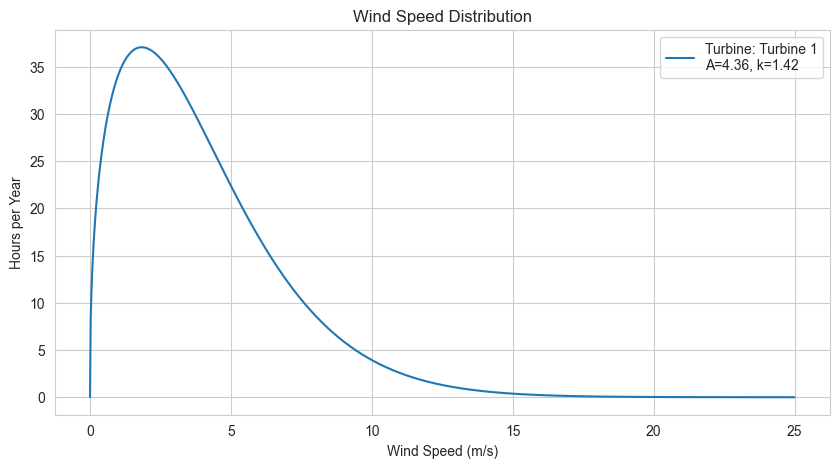

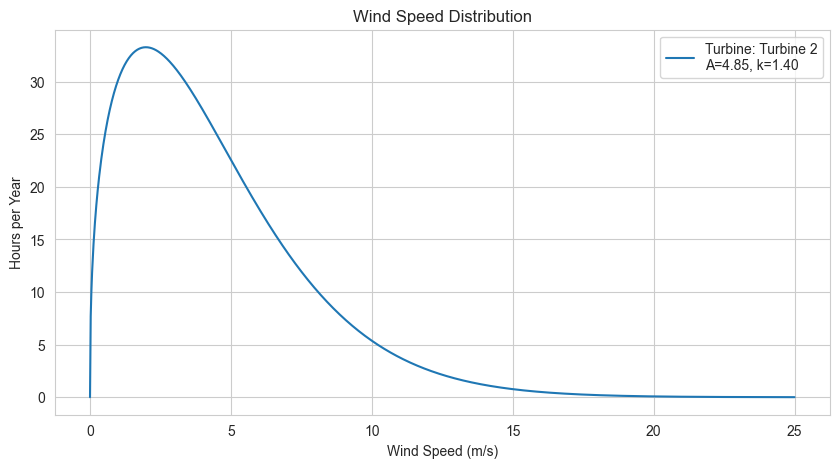

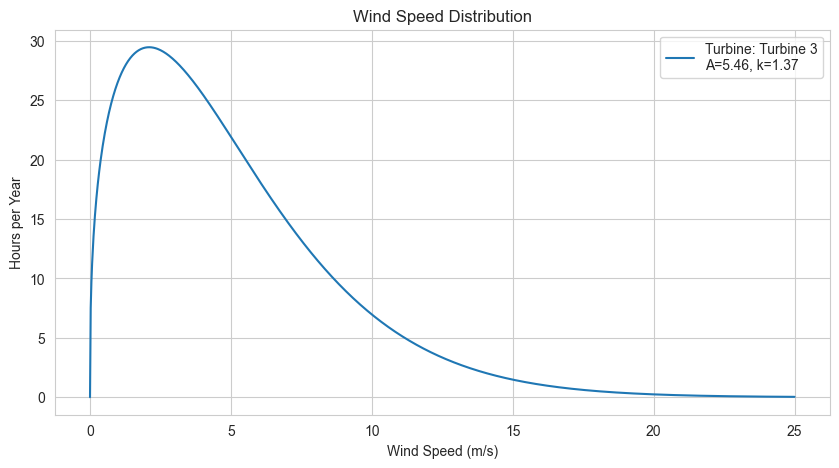

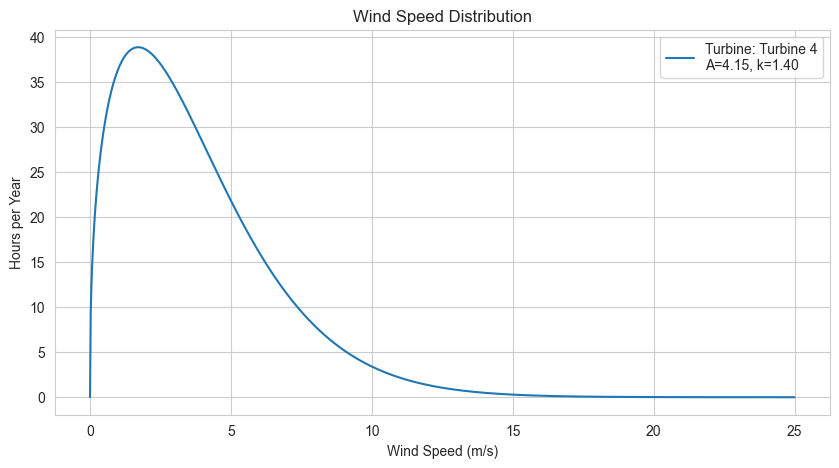

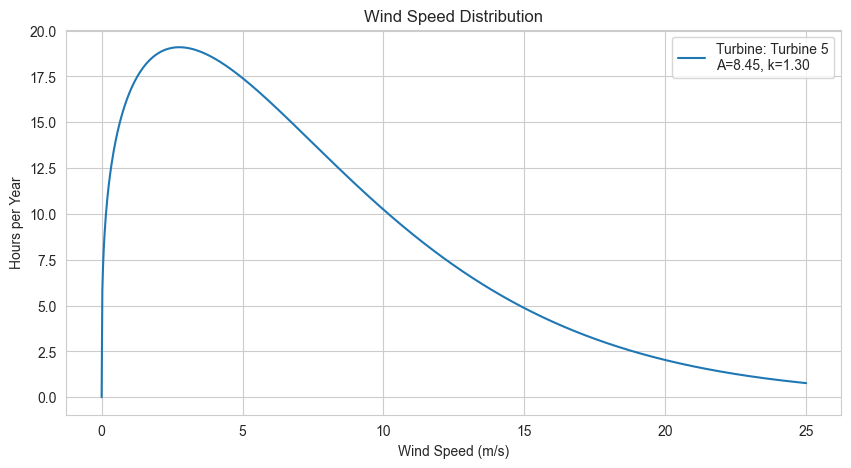

In [19]:
wt.ws.plot_weibull_wind_speed_distribution()

In [9]:
test=wt.na.interpolate_noise(wt.ws.wind_speed,wt.noise)

In [10]:
test3=wt.na.separate_sound_emissions4(test2)
test3

NameError: name 'test2' is not defined

In [ ]:
test2=wt.na.superpose_several_wind_turbine_sounds_in_dB3(test)

In [ ]:
test2

In [ ]:
# Check the first few keys to ensure they are datetime objects or strings
for key in list(test2.keys())[:5]:
    print(f"Key: {key}, Type: {type(key)}")


In [ ]:
test5=wt.na.separate_sound_emissions4(test2)

In [ ]:
wt.na.calculate_lden4(test5)

In [ ]:
print(test4)

In [ ]:
import random
df=test2

# Assuming df is your dictionary
sample_size = 10
sampled_items = random.sample(list(df.items()), sample_size)

for key, value in sampled_items:
    print(f"{key}: {value}")

In [21]:
# Assuming 'results' is your dictionary
sample_time = list(df.keys())[0]  # Just an example to pick the first time
sample_data = df[sample_time][0]  # Get the first item in the list for this time

intensity_level_dataset = sample_data['intensity_level_dB']

# Print out the details of this xarray Dataset
print(intensity_level_dataset)


<xarray.Dataset>
Dimensions:             ()
Coordinates:
    time                datetime64[ns] 2016-01-01
    turbine             <U9 'Turbine 1'
Data variables:
    WD10                float64 137.0
    WS10                float64 -93.11
    interpolated_noise  float64 -93.99
Attributes: (12/138)
    ADAPT_DT_MAX:                    15.0
    ADAPT_DT_MIN:                    3.0
    ADAPT_DT_START:                  13.0
    AER_ANGEXP_OPT:                  1
    AER_ANGEXP_VAL:                  1.2999999523162842
    AER_AOD550_OPT:                  1
    ...                              ...
    eastBoundLongitude:              8.508267
    verticalExtentMinimum:           50.0
    verticalExtentMaximum:           500.0
    temporalExtentMinimum:           2016-01-01T00:00:00
    temporalExtentMaximum:           2018-12-31T23:30:00
    subset_pid:                      https://wps.neweuropeanwindatlas.eu/api/...


In [9]:
import sys
print(sys.getsizeof(test2))

1310808


In [10]:
wt.fetch_noise_map()

In [11]:
wt.noise_map.individual_noise

[{'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 1',
  'listener_position': (47.3769, 8.5517),
  'distance': 4739.384368091734,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-0.86271186,  1.64914879,  6.80501367, 10.2505644 , 11.31025255,
         11.19846906, 11.37621179, 11.61089155, 11.52614748, 11.4738891 ])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0},
 {'turbine_name': 'Turbine 1',
  'turbine_position': (47.34606, 8.508267),
  'listener_name': 'Listener 2',
  'listener_position': (47.3869, 8.5617),
  'distance': 6067.685257970055,
  'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
  array([-5.66533591, -3.15347526,  2.00238962,  5.44794036,  6.50762851,
          6.39584501,  6.57358774,  6.80826751,  6.72352344,  6.67126505])
  Coordinates:
      turbine     <U9 'Turbine 1'
    * wind_speed  (wind_speed) flo

SyntaxError: invalid syntax (473536216.py, line 1)

In [ ]:
print(test)

In [ ]:
test2=wt.na.calculate_sound_at_observation_points3(listening_points,test)

In [ ]:
print(day_data)

In [ ]:
wt.noise_map.plot_noise_map()

In [ ]:
wt.noise_map.display_turbines_on_map()

In [7]:
test1,test2=wt.noise_map.superpose_several_wind_turbine_sounds_in_dB()

In [9]:
test2

<xarray.DataArray (wind_speed: 10)>
array([26.92270842, 30.29648395, 35.5065444 , 38.99255121, 40.5007292 ,
       40.46692957, 40.49763406, 40.58916056, 40.41167925, 40.4758298 ])
Coordinates:
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
    turbine     <U9 'Turbine 5'

In [10]:
wt.noise_map.superpose_several_wind_turbine_sounds_in_dB()

([{'turbine_name': 'Turbine 4',
   'turbine_position': (47.3869, 8.5317),
   'listener_name': 'Listener 1',
   'listener_position': (47.3769, 8.5517),
   'distance': 1871.880419712476,
   'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
   array([ 8.75196953, 15.02896358, 20.71550192, 22.64324678, 24.18128306,
          24.45084257, 24.69211265, 24.77838765, 24.72082212, 24.87492184])
   Coordinates:
       turbine     <U9 'Turbine 4'
     * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0},
  {'turbine_name': 'Turbine 4',
   'turbine_position': (47.3869, 8.5317),
   'listener_name': 'Listener 2',
   'listener_position': (47.3869, 8.5617),
   'distance': 2258.519683217435,
   'intensity_level_dB': <xarray.DataArray (wind_speed: 10)>
   array([ 6.34777544, 12.62476948, 18.31130783, 20.23905268, 21.77708897,
          22.04664848, 22.28791856, 22.37419355, 22.31662803, 22.47072775])
   Coordinates:
       turbine     <U9 'Turbine 4'
     * wind_speed  

In [11]:
test1 = wt.noise_map.superpose_several_wind_turbine_sounds4()
test1

AttributeError: 'NoiseMap' object has no attribute 'superpose_several_wind_turbine_sounds4'

In [7]:
wt.analyze_noise()

In [9]:
wt.na.interpolate_noise()

TypeError: NoiseAnalysis.interpolate_noise() missing 2 required positional arguments: 'wind_speed_data' and 'noise_data'

In [6]:
wt.noise

<xarray.DataArray (turbine: 2, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [13]:
wt.noise_map.calculate_dB_at_distance(100,10)

AttributeError: 'NoiseMap' object has no attribute 'calculate_dB_at_distance'

In [6]:
test3=wt.na.interpolate_noise(wt.na.wind_speed,wt.noise)

In [7]:
time_period_data = wt.na.separate_time_periods2(test3)

In [8]:
wt.na.calculate_sound_at_observation_points3(listening_points,test3)

Processing observation points:   0%|                                          | 0/3 [01:14<?, ?it/s]


TypeError: unhashable type: 'dict'

In [11]:
# Example to check the format of observation points
for point in listening_points:
    print(point)  # Each should be a tuple of two floats (latitude, longitude)

# Example to check the format of turbine positions
for turbine in wind_turbines:
    print(turbine['name'], turbine['position'])  # Each position should be a tuple of two floats


{'name': 'Listener 1', 'position': (47.3769, 8.5517)}
{'name': 'Listener 2', 'position': (47.3869, 8.5617)}
{'name': 'Listener 3', 'position': (47.3461, 8.5175)}
Turbine 1 (47.34606, 8.508267)
Turbine 5 (47.34955801547433, 8.491580864126439)


In [15]:
# Step 1: Separate wind speed data by time periods
time_period_data = wt.na.separate_time_periods2()

# Step 2: Convert wind speed to noise levels
# This step requires a method to convert wind speed to noise levels.
# Assuming such a method exists (convert_wind_speed_to_noise), apply it to the data
day_noise = wt.na.convert_wind_speed_to_noise(time_period_data['day'])
evening_noise = wt.na.convert_wind_speed_to_noise(time_period_data['evening'])
night_noise = wt.na.convert_wind_speed_to_noise(time_period_data['night'])

# Step 3: Use the modified calculate_lden method
lden_value = wt.na.calculate_lden(day_noise, evening_noise, night_noise)


TypeError: NoiseAnalysis.separate_time_periods2() missing 1 required positional argument: 'noise_data'

In [8]:
wt.noise_map.superpose_several_wind_turbine_sounds()

AttributeError: 'NoneType' object has no attribute 'superpose_several_wind_turbine_sounds'

In [7]:
wt.noise_map.generate_noise_map()

AttributeError: 'NoneType' object has no attribute 'generate_noise_map'

In [1]:
wt.noise_map.plot_noise_map()

NameError: name 'wt' is not defined

In [8]:
wt.noise_map.

SyntaxError: invalid syntax (800052328.py, line 1)

In [9]:
wt.noise_map.plot_relief_between_points()

TypeError: NoiseMap.plot_relief_between_points() missing 2 required positional arguments: 'wind_turbines' and 'observation_points'

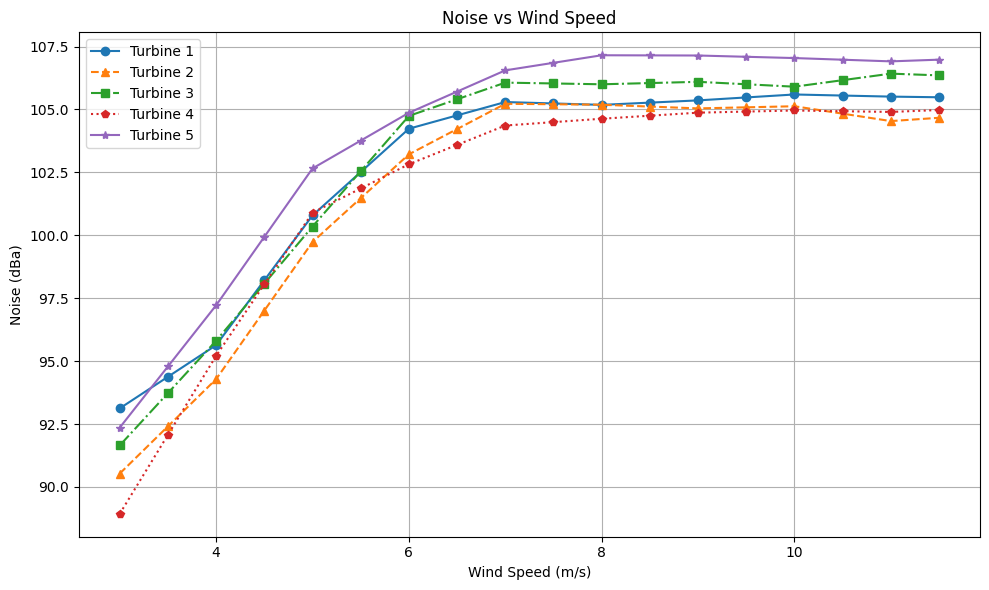

In [10]:
wt.plot_noise_curve()

In [10]:
wt.analyze_noise()

In [11]:
wt.na.wind_speed.sel(variable="WS10")

<xarray.DataArray (turbine: 2, time: 52608)>
array([[0.8704885, 1.4370455, 1.7163366, ..., 1.4840467, 1.3285879,
        1.3531564],
       [2.0572448, 2.1318624, 2.0345478, ..., 1.1287701, 1.2553074,
        1.052733 ]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:30:00
  * turbine   (turbine) object 'Turbine 1' 'Turbine 2'
    variable  <U4 'WS10'
Attributes: (12/138)
    ADAPT_DT_MAX:                    15.0
    ADAPT_DT_MIN:                    3.0
    ADAPT_DT_START:                  13.0
    AER_ANGEXP_OPT:                  1
    AER_ANGEXP_VAL:                  1.2999999523162842
    AER_AOD550_OPT:                  1
    ...                              ...
    eastBoundLongitude:              8.508267
    verticalExtentMinimum:           50.0
    verticalExtentMaximum:           500.0
    temporalExtentMinimum:           2016-01-01T00:00:00
    temporalExtentMaximum:           2018-12-31T23:30:00
    subset_pid:                      https://wps.neweuropeanwindatlas.eu/api/...

In [ ]:
wt.

In [17]:
wt.na.noise

<xarray.DataArray (turbine: 2, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [18]:
wt.na.noise.sel(turbine="Turbine 1").interp(wt.na.wind_speed.sel(variable="WS10", turbine="Turbine 1").values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [17]:
wt.fetch_noise_map()

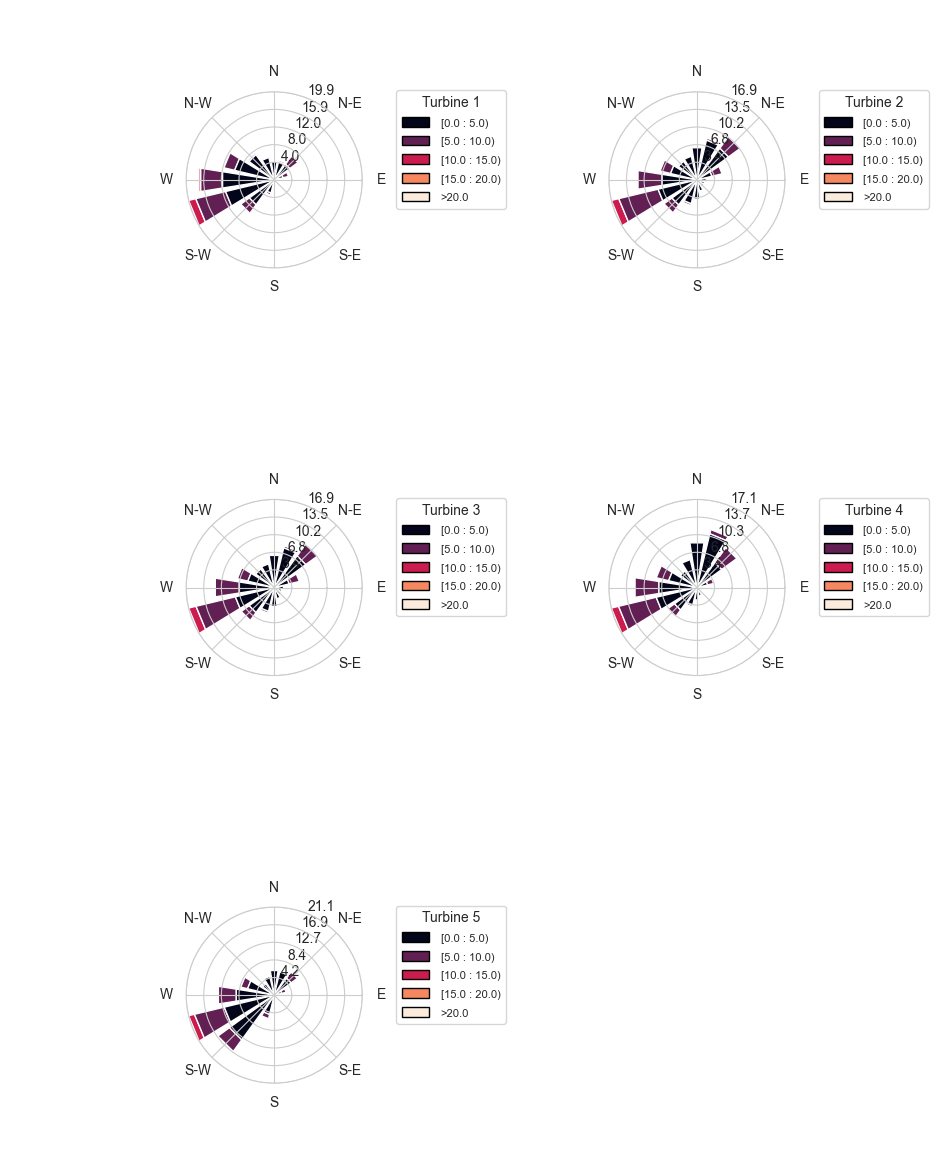

In [23]:
wt.ws.create_wind_roses()

In [12]:
wt.ws.download_weibull_coefficients()

{'Turbine 1': {'A': masked_array(data=[4.3577623],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4160156],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 2': {'A': masked_array(data=[4.8460517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4003906],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 3': {'A': masked_array(data=[5.463169],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.3691406],
               mask=False,
         fill_value=1e+20,
              dtype=float32)},
 'Turbine 4': {'A': masked_array(data=[4.1518517],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  'k': masked_array(data=[1.4042969],
               mask=False,
         fill_value=1e+20,


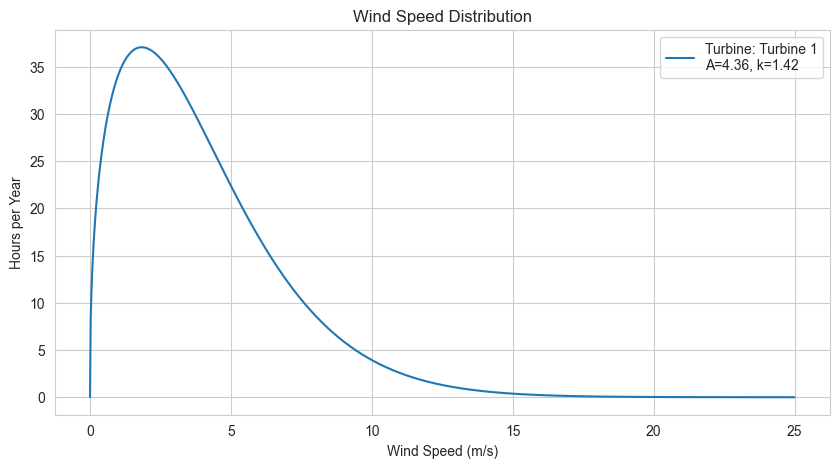

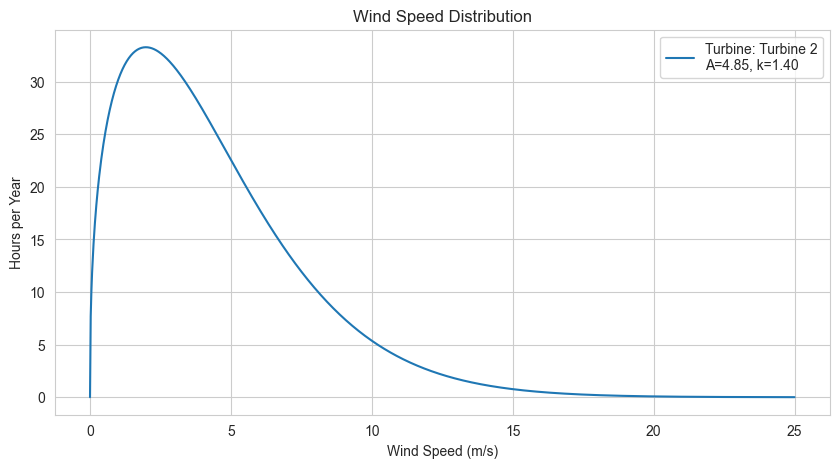

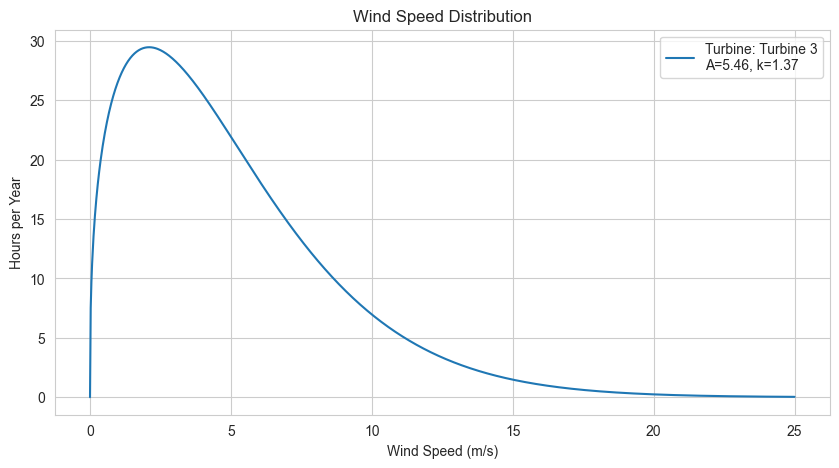

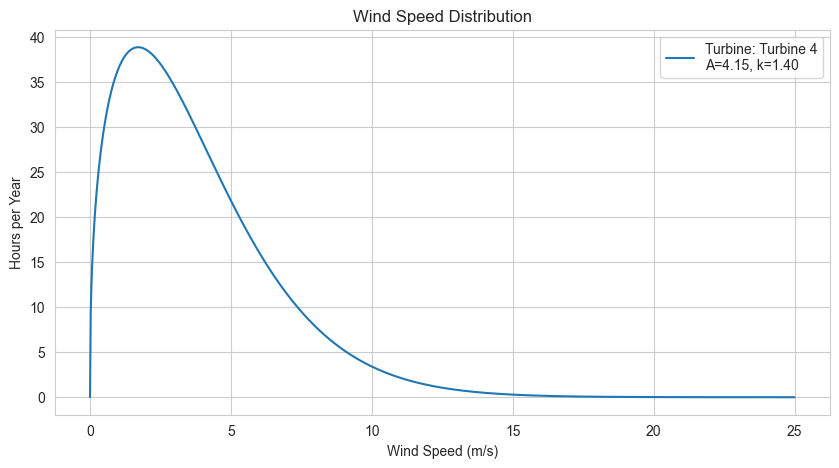

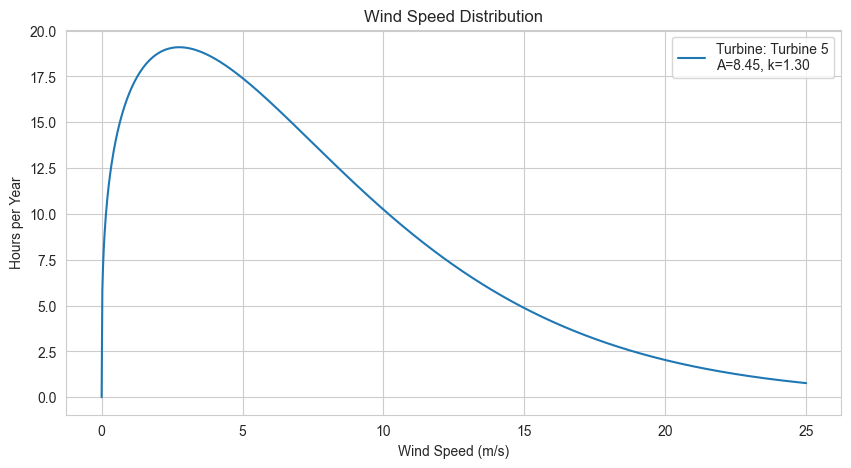

In [13]:
wt.ws.plot_weibull_wind_speed_distribution()

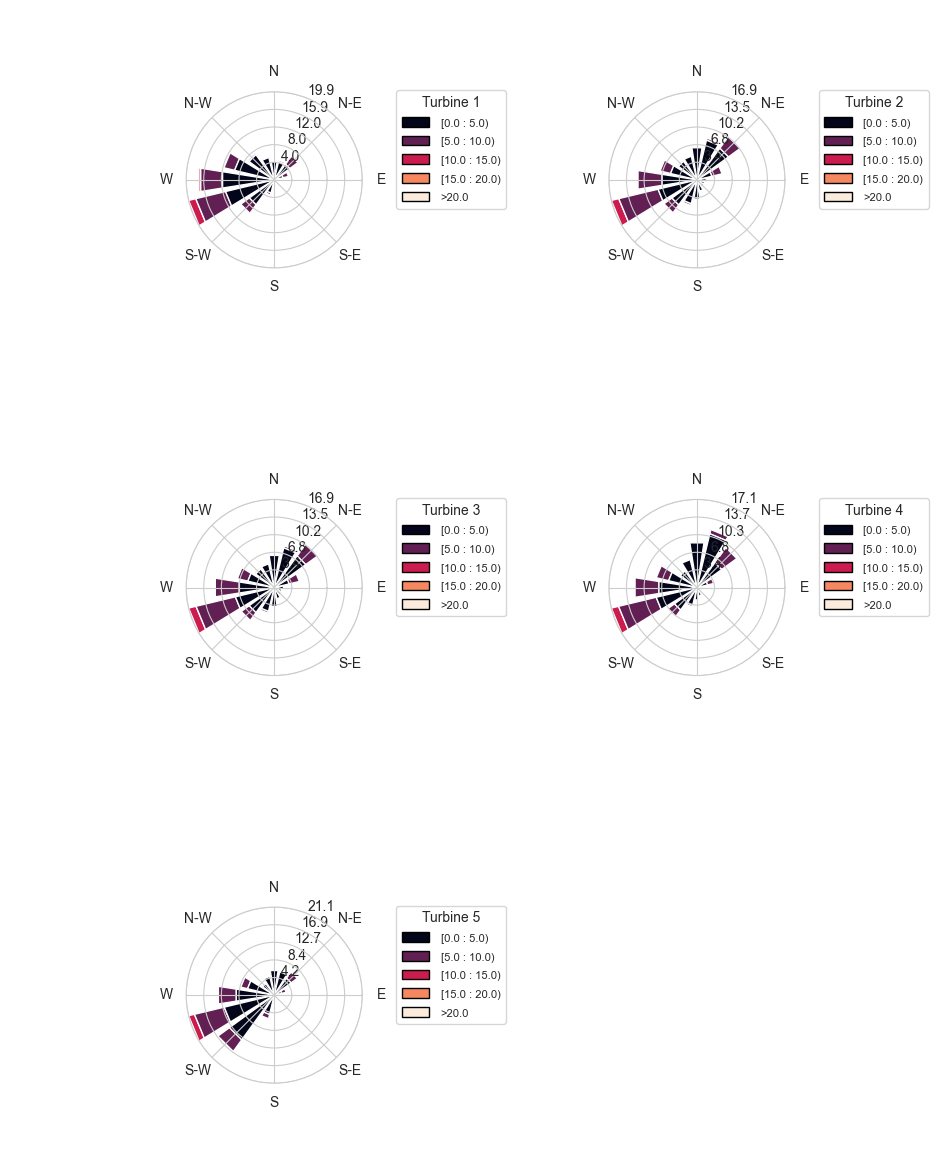

In [14]:
wt.ws.create_wind_roses()

In [24]:
wt.fetch_noise_map()

In [26]:
wt.noise_map

In [18]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.12259415,  95.6344548 , 100.79031968, 104.23587041,
        105.29555857, 105.18377507, 105.3615178 , 105.59619756,
        105.51145349, 105.45919511],
       [ 90.53188794,  94.28483202,  99.73278739, 103.21867918,
        105.22704265, 105.18888759, 105.04308884, 105.12864198,
        104.5392056 , 104.80122827],
       [ 91.65023356,  95.81009227, 100.34919991, 104.74511418,
        106.06722633, 106.00110654, 106.09903508, 105.90556801,
        106.42444963, 106.2862498 ],
       [ 88.93339104,  95.21038508, 100.89692343, 102.82466829,
        104.36270457, 104.63226408, 104.87353416, 104.95980916,
        104.90224363, 105.05634335],
       [ 92.35752798,  97.21961589, 102.65760376, 104.86892874,
        106.55481959, 107.15476983, 107.14490506, 107.04331315,
        106.91218381, 107.04703156]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [28]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

In [27]:
wt.noise_map.display_turbines_on_map()

In [6]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)}]

In [7]:
wt.listeners

[{'name': 'Listener 1', 'position': (47.3769, 8.5517)},
 {'name': 'Listener 2', 'position': (47.3869, 8.5617)},
 {'name': 'Listener 3', 'position': (47.346188367055674, 8.507587721502468)}]

In [ ]:
n.whatsmyname()

In [9]:
import requests
import netCDF4
import tempfile
import os

url = "https://wps.neweuropeanwindatlas.eu/api/microscale-atlas/v1/get-data-point?latitude=47.074798&longitude=7.684937&height=50&variable=wind_speed&variable=weib_A_combined&variable=weib_k_combined"

try:
    response = requests.get(url, timeout=20)
    response.raise_for_status()
except requests.RequestException as e:
    print(f"Request failed: {e}")

else:
    # Save the file temporarily
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        tmp_file_name = tmp_file.name
        tmp_file.write(response.content)

    # Load the data into a netCDF4 dataset
    try:
        with netCDF4.Dataset(tmp_file_name, mode='r') as ds:
            # Extract wind speed, A, and k values
            wind_speed = ds['wind_speed'][:]
            weib_A_combined = ds['weib_A_combined'][:]
            weib_k_combined = ds['weib_k_combined'][:]

            print("Wind Speed:", wind_speed)
            print("Weibull A:", weib_A_combined)
            print("Weibull k:", weib_k_combined)
    finally:
        # Delete the temporary file
        os.remove(tmp_file_name)


Wind Speed: [5.7135005]
Weibull A: [6.345123]
Weibull k: [1.5332031]
